In [45]:
# def plot_scatter(target_runs, y_key):
#     import plotly.express as px
#     import pandas as pd
#     import math
    
#     # Assuming target_runs is prepared with your data
#     # Convert target_runs to a DataFrame for easier manipulation with Plotly
#     df = pd.DataFrame(target_runs, columns=["train_loss", "eval_loss", "inp_embed", "out_embed", "lr", "width"])
    
#     # Apply log scale to lr for the plot
#     df['log_lr'] = df['lr'].apply(lambda x: math.log2(x))
    
#     # Creating the plot
#     fig = px.line(df, x='log_lr', y=y_key,
#                   color='width',  # This separates the lines by width
#                   hover_data=['width'],  # This adds the width to the hover information
#                   title='Training Loss vs. Log-Scaled Learning Rate',
#                   labels={'log_lr': 'Log Scale Learning Rate (log2(lr))', 'train_loss': 'Training Loss', 'width': 'Width'})
    
#     # Update the line titles to include the width value
#     for width, trace in zip(df['width'].unique(), fig.data):
#         trace.name = f'Width: {width}'
#         width = width.dropna(subset=[y_key])  # Remove rows with NaN values in y_key

#     # y_min = df[y_key].min() # Adjust the lower bound as needed
#     y_max = 0.1  # Adjust the upper bound as needed
#     fig.update_yaxes(range=[y_min, y_max])
    
#     return fig

In [46]:
def _plot_scatter(target_runs, y_key):
    import plotly.express as px
    import pandas as pd
    import math
    
    # Assuming target_runs is prepared with your data
    # Convert target_runs to a DataFrame for easier manipulation with Plotly
    df = pd.DataFrame(target_runs, columns=["train_loss", "eval_loss", "inp_embed", "out_embed", "lr", "width"])
    
    # Apply log scale to lr for the plot
    df['log_lr'] = df['lr'].apply(lambda x: math.log2(x))
    
    # Convert y_key column to numeric type
    df[y_key] = pd.to_numeric(df[y_key], errors='coerce')
    
    # Replace NaN values with a specific value (e.g., -1) to indicate missing data
    df[y_key] = df[y_key].fillna(-1)
    
    # Creating the plot
    fig = px.line(df, x='log_lr', y=y_key,
                  color='width',  # This separates the lines by width
                  hover_data=['width'],  # This adds the width to the hover information
                  title='Training Loss vs. Log-Scaled Learning Rate',
                  labels={'log_lr': 'Log Scale Learning Rate (log2(lr))', 'train_loss': 'Training Loss', 'width': 'Width'})
    
    # Update the line titles to include the width value
    for width, trace in zip(df['width'].unique(), fig.data):
        trace.name = f'Width: {width}'
    
    # Add markers for NaN values
    for trace in fig.data:
        trace.mode = 'lines+markers'
        trace.marker.symbol = ['circle' if y != -1 else 'x' for y in trace.y]
        trace.marker.size = [6 if y != -1 else 10 for y in trace.y]
    
    y_min = df[df[y_key] != -1][y_key].min() if not df[df[y_key] != -1].empty else 0
    y_max = 0.1  # Adjust the upper bound as needed
    fig.update_yaxes(range=[y_min, y_max])
    
    return fig

In [47]:
def extract_runs(num_layers, batch_size, is_mup):
    target_runs = []
    for run in runs:
        if run.config["config"]["num_layers"] == num_layers and run.config["config"]["batch_size"] == batch_size:
            if is_mup:
                train_loss = run.summary["mup_loss"]
                eval_loss = run.summary["mup_eval_loss"]
                inp_embed = run.summary["mup_inp_embed"]
                out_embed = run.summary["mup_out_embed"]
            else:
                train_loss = run.summary["ref_loss"]
                eval_loss = run.summary["ref_eval_loss"]
                inp_embed = run.summary["ref_inp_embed"]
                out_embed = run.summary["ref_out_embed"]
    
            lr = run.config["config"]["lr"]
            width = run.config["config"]["target_width"]
            target_runs.append((train_loss, eval_loss, inp_embed, out_embed, lr, width))
    return target_runs

In [48]:
import wandb

api = wandb.Api()
entity, project = "neuralink", "exp14_mup_grid_search"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

In [49]:
next(runs).config["config"]

{'lr': 0.25,
 'seed': 42,
 'exp_name': 'exp14_grid_search',
 'init_std': 1,
 'n_epochs': 5,
 'batch_size': 2048,
 'num_layers': 32,
 'target_width': 8192}

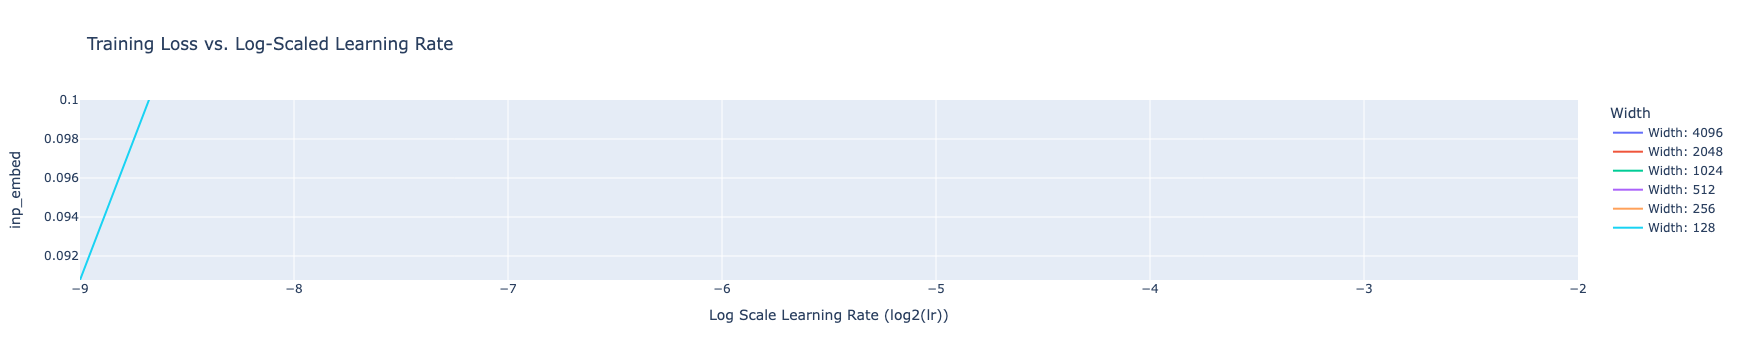

In [19]:
plot_scatter(extract_runs(num_layers=16, batch_size=1024, is_mup=True), y_key="inp_embed").show()

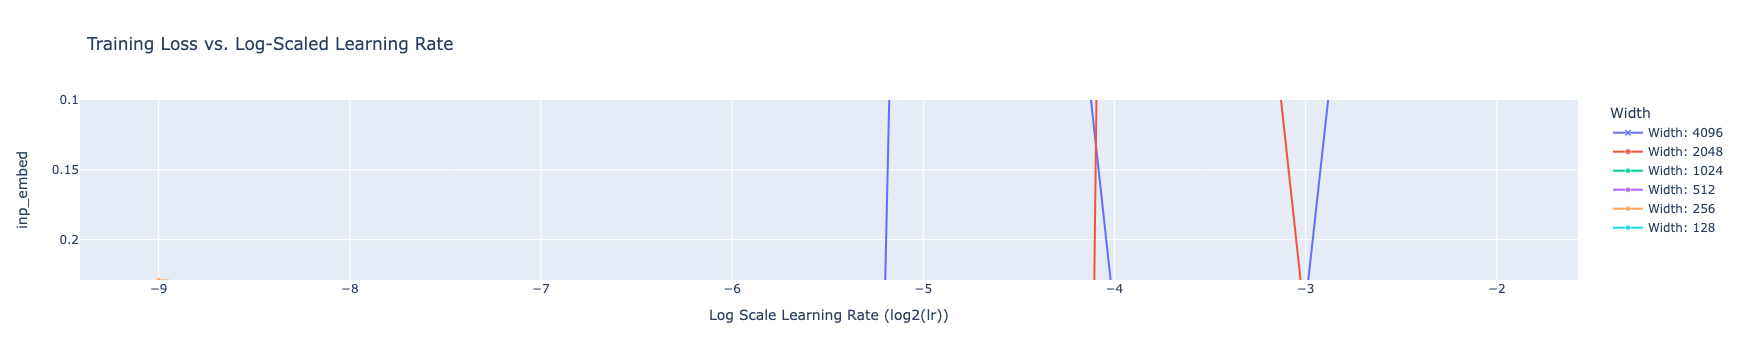

In [41]:
_plot_scatter(extract_runs(num_layers=16, batch_size=1024, is_mup=False), y_key="inp_embed").show()

### Loss across widths and lr

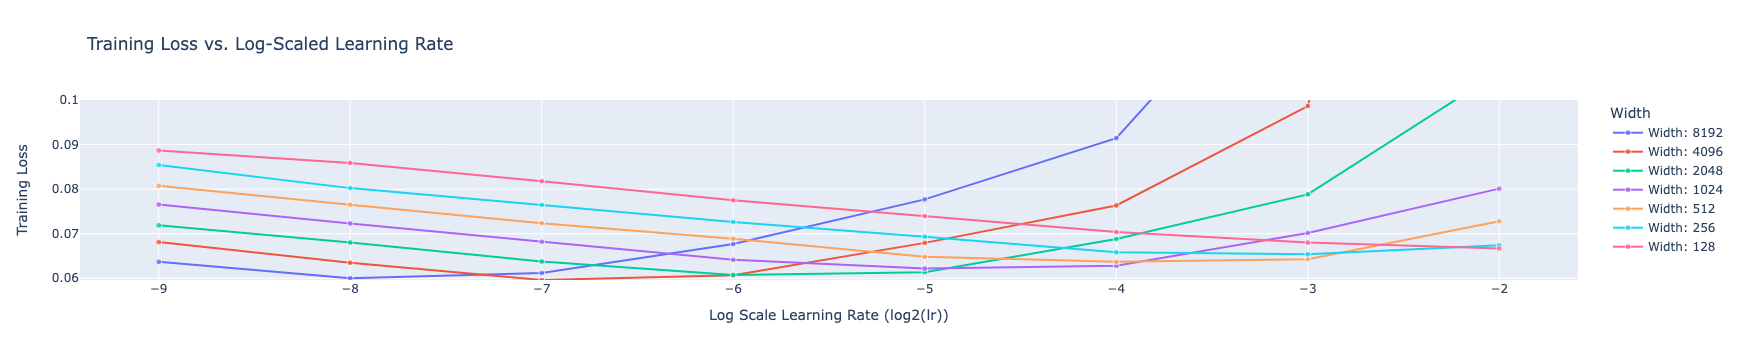

In [58]:
_plot_scatter(extract_runs(num_layers=4, batch_size=1024, is_mup=True), y_key="train_loss").show()

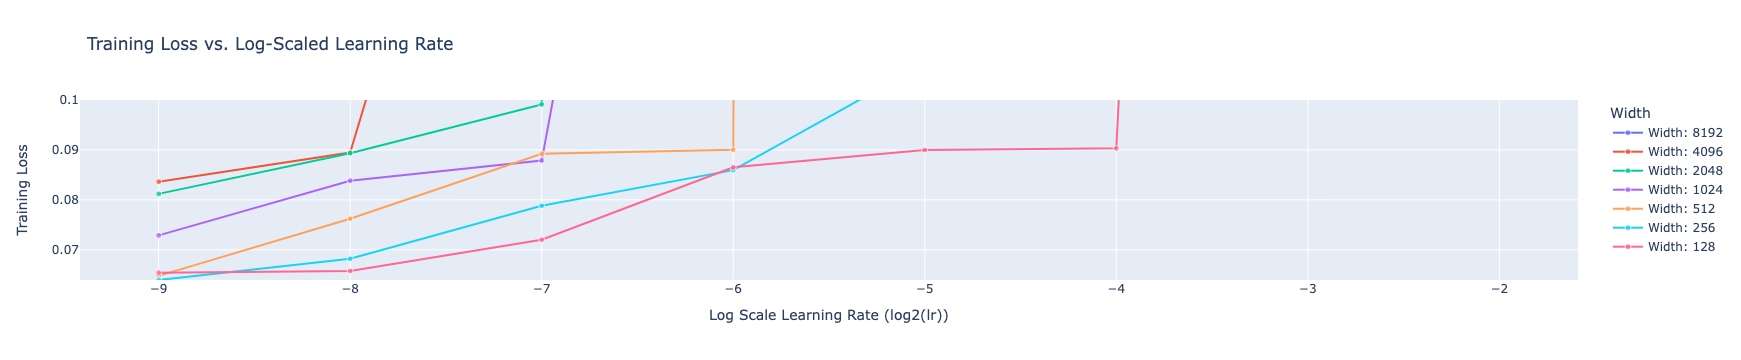

In [59]:
_plot_scatter(extract_runs(num_layers=4, batch_size=1024, is_mup=False), y_key="train_loss").show()

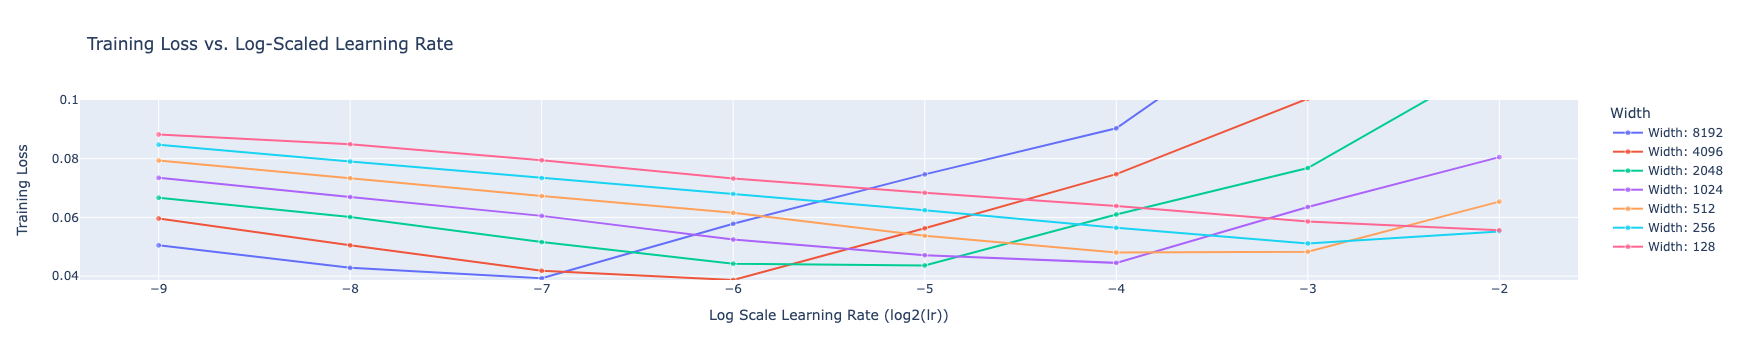

In [63]:
_plot_scatter(extract_runs(num_layers=4, batch_size=2048, is_mup=True), y_key="train_loss").show()

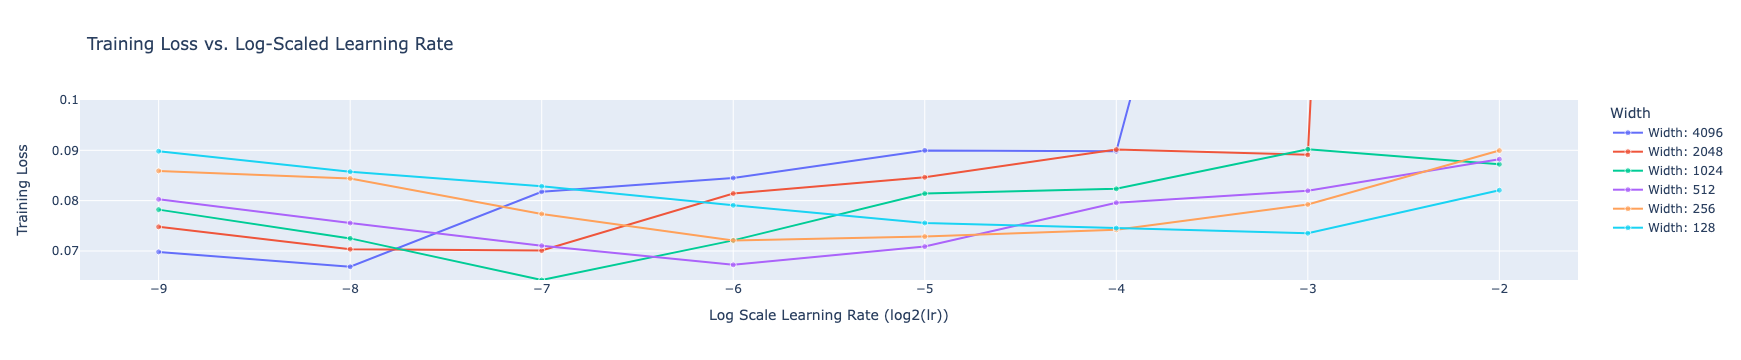

In [66]:
_plot_scatter(extract_runs(num_layers=16, batch_size=2048, is_mup=True), y_key="train_loss").show()